In [63]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from ena import text_preprocessing as tp

In [5]:
root_path = 'C:\Users\CATALINA ESPINOZA\Documents\clusters ciae'
data_path = os.path.join(root_path,'data')
code_path = os.path.join(data_path,'codificaciones')
output_path = os.path.join(root_path,'output')
pickle_path = os.path.join(output_path,'pickles')
by_grade_path = os.path.join(output_path,'textos_ulloa_by_curso')
by_grade_and_content = os.path.join(data_path,'textos_ulloa_by_grade_content')
by_content_path = os.path.join(output_path,'textos_ulloa_by_contenido')
all_files_path = os.path.join(data_path,'textos_ulloa')
all_classes = os.path.join(data_path,'clases_ulloa.txt')

In [122]:
# leer excels
mo7_1 = pd.read_excel(os.path.join(code_path,'Codificacion de topicos 7th_Geographical_factors1.xlsx'),encoding='utf-8')
mo7_1[u'Línea de texto'].fillna('',inplace=True)
mo7_2 = pd.read_excel(os.path.join(code_path,'Codificacion de topicos 7th_Geographical_factors2.xlsx'),encoding='utf-8')
mo7_2[u'Línea de texto'].fillna('',inplace=True)
cross_border = pd.read_excel(os.path.join(code_path,'Codificacion de topicos_Cross_Border_Santa_Rita_Texas.xlsx'),encoding='utf-8')
cross_border[u'Línea de texto'].fillna('',inplace=True)

In [123]:
print sum(mo7_2.columns == cross_border.columns) == 27
print sum(mo7_2.columns == mo7_1.columns)== 27

True
True


(array([365.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  19.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

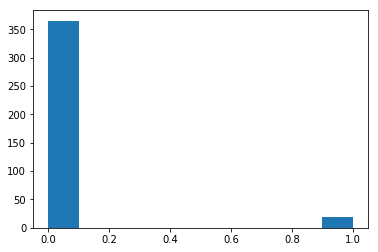

In [124]:
plt.hist(mo7_2[u'Administración'].values)

(array([107.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  25.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

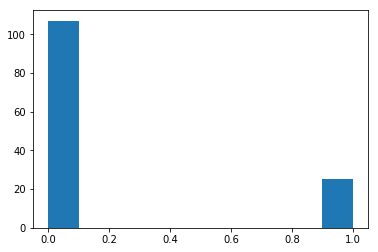

In [125]:
plt.hist(cross_border[u'Administración'].values)

In [38]:
les_rows = []
for row in mo7_1.iterrows():
    index, data = row
    les_rows.append(np.array(data.tolist()[1:]))

In [40]:
# dividir sesiones en pedazos de 5 minutos movidos en 1
les_chunks = []
c = 0
for row in les_rows:
    if c%4 == 0:
        les_chunks.append([])
    les_chunks[-1].append(row)
    c+=1

392

In [126]:
lines_dict = {'7th_Geographical_factors1':mo7_1[u'Línea de texto'].values,'7th_Geographical_factors2':mo7_2[u'Línea de texto'].values,'cross_border':cross_border[u'Línea de texto'].values}

In [108]:
label_dict = {}
for k in lines_dict.keys():
    label_dict[k] = k

In [127]:
reload(tp)

<module 'ena.text_preprocessing' from 'ena\text_preprocessing.pyc'>

In [128]:
d,l = tp.split_excels(lines_dict,label_dict,period_length=5,overlap_length=1,n_seconds_per_line=15)

In [111]:
# TODO: Build a function to split list of excel filesons

In [ ]:
# importar info topicos 

In [ ]:
# voy a tener por linea pertenencia a topicos
# se tienen que sumar por ventana movediza de 30s
# por cada pedazo tengo que calcular una co-occurrencia matrix: esta se calcula
# sumando todas las co-ocurrencias de las ventanas de 30 s

In [53]:
mo7_1[u'Línea de texto'].values

array([u'ya guarde silencio tome asiento por favor', u'Gabriel',
       u'estaba haciendo por favor', u'Felipe en relleno',
       u'lo voy a guardar Bueno entonces', u'a ver la \xfaltima clase',
       u'si la clase va a estar terminamos hablando de del',
       u'los factores determinan el clima que modifican el clima la parte astron\xf3mica',
       u'recuerda esto es la radiaci\xf3n del Sol y esto de los equinoccios y los solsticios',
       u'la palabra los cambios de la estaci\xf3n estoy viendo hablando un poco sobre los',
       u'factores geogr\xe1ficos de los factores astron\xf3micos',
       u'por favor todos los factores geogr\xe1ficos como los factores',
       u'astron\xf3micos no son determinados y no pueden ser modificados por el cel',
       u'el hombre solamente son condiciones naturales de',
       u'de la tierra que van desde mirando van variando Iv\xe1n produciendo que los',
       u'Esas son las que a distintos',
       u'Entonces no me pregunt\xf3 con qui\xe9n se 